### Score: `[36]`

Q1. `[13]` k不需要更新

Q2. `[18]` xi error

Q3. `[5]` error


[347.4178403755869, 348.6305164313615, 349.90985915713617, 351.2882629129108, 352.72769952868543, 354.17089201446004, 355.6460093902346, 357.09107981600926, 358.5323943717839, 360.02253521755847, 361.57417841333313, 363.1929577591078, 364.8624413248824, 366.541314560657, 368.21314554643163, 369.96572770220627, 371.79342722798094, 373.66854460375555, 375.7230046995301, 377.9497652653048]
[347.4178403755869, 386.18707364499534, 388.5866589422219, 391.4335715320455, 394.27707938195556, 397.13668991797414, 400.0257301434407, 402.8852322667539, 405.7407218048692, 408.6450094164976, 411.6108507137696, 414.64388975139065, 417.7277021705498, 420.8209284524723, 423.90704695243477, 427.07383526854994, 430.31587112397307, 433.60538157500133, 437.07424253599385, 440.71572626781847]


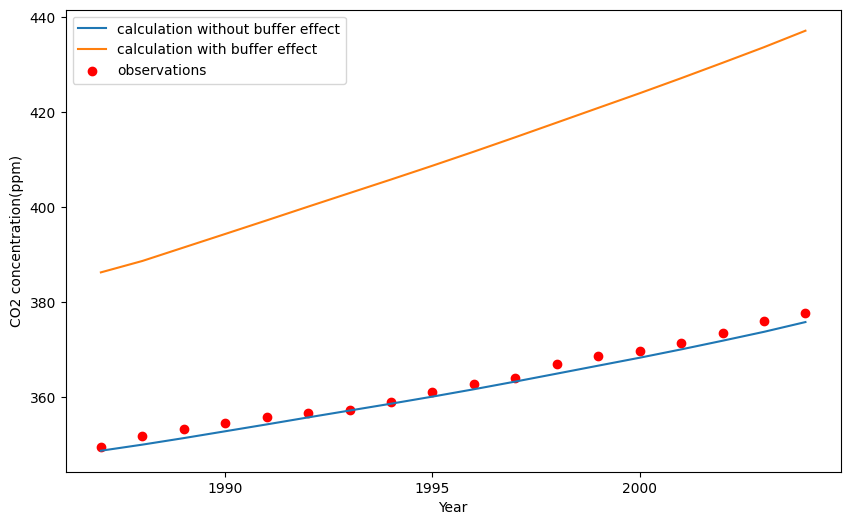

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
#######注释部分好像有问题，直接跳过注释部分
#sea表示海洋表面浓度
sea=pd.read_csv('co2_annmean_gl.csv',comment='#')
#atm表示大气中浓度
atm=pd.read_csv('co2_annmean_mlo.csv',comment='#')
gama=np.array(pd.read_excel('gama.xlsx'))
gama_list = [arr[0] for arr in gama]
#burn表示燃烧释放
with open('global.1751_2014.ems', 'r') as file:
    burn = file.read()
#5.1 
#读取1986~2001的数据
sea['year']=sea['year'].astype(int)
nsea=sea[(sea['year']>=1986)&(sea['year']<=2004)]
atm['year']=atm['year'].astype(int)
natm=atm[(atm['year']>=1986)&(atm['year']<=2004)]
#转化burn的文件类型
#对burn进行切片
lines = burn.split('\n')
nburn = []
# 遍历每一行，寻找并提取所需年份的数据
for i, line in enumerate(lines):
    # 检查行是否包含年份数据（即列格式的年份数据）
    if line.startswith('Year') or not line.strip():  # 跳过表头和空行
        continue
    parts = line.split()
    if len(parts) >= 1 and parts[0].isdigit():  # 确保行的第一个元素是年份
        year = int(parts[0])
        # 检查年份是否在1986到2004年之间
        if 1986 <= year <= 2004:
            # 添加到结果列表中
            nburn.append(line)
#转化nburn的类型
burn_data = []
# 遍历nburn中的每一行数据
for line in nburn:
    #切片
    parts = line.split()
    # 将每一列转换为适当的数值类型（int或float）
    year = int(parts[0])  # 年份转换为整数
    total = float(parts[1])  # 总排放量转换为浮点数
    gas = float(parts[2])  # 气体排放量转换为浮点数
    liquids = float(parts[3])  # 液体排放量转换为浮点数
    solids = float(parts[4])  # 固体排放量转换为浮点数
    production = float(parts[5])  # 生产排放量转换为浮点数
    flaring = float(parts[6])  # 燃烧排放量转换为浮点数
    per_capita = float(parts[7])  # 人均排放量转换为浮点数 
    # 将转换后的数据存储为一个列表
    burn_line = [year, total, gas, liquids, solids, production, flaring, per_capita]
    burn_data.append(burn_line)
#模型计算
sea1986=900/2.13
atm1986=740/2.13
burn_list = [item[1] for item in burn_data]
sea_list=[]
atm_list=[]
sea_list.append(sea1986)
atm_list.append(atm1986)
n=len(gama)
for i in range(n):
    k12=105/(atm_list[i]*2.13) # BUG here 这里的k似乎不用更新
    k21=102/(sea_list[i]*2.13) # BUG here 这里的k似乎不用更新
    #k12=105/740
    #k21=102/900
    atm_val=atm_list[i]-k12*atm_list[i]+k21*sea_list[i]+gama_list[i]
    sea_val=sea_list[i]+k12*atm_list[i]-k21*sea_list[i]
    sea_list.append(sea_val)
    atm_list.append(atm_val)
print(atm_list)
#5.2  
sea_list2=[]
atm_list2=[]
sea_list2.append(sea1986)
atm_list2.append(atm1986)
N20=821/2.13

for i in range(n):
    k12=105/(atm_list2[i]*2.13)
    k21=102/(sea_list2[i]*2.13)
    #k12=105/740
    #k21=102/900
    xi=3.69+1.86*0.01*atm_list2[i]-1.80*0.000001*atm_list2[i]**2 # BUG here 
    atm_val=atm_list2[i]-k12*atm_list2[i]+k21*(N20+xi*(sea_list2[i]-N20))+gama_list[i]
    sea_val=sea_list2[i]+k12*atm_list2[i]-k21*(N20+xi*(sea_list2[i]-N20))
    sea_list2.append(sea_val)
    atm_list2.append(atm_val)
print(atm_list2)
#5.3
plot=natm.copy()
plot=plot.drop('unc',axis=1)
del atm_list[0]
del atm_list[18]
del atm_list2[0]
del atm_list2[18]    
plot=plot[plot['year']!=1986]
plot['list']=atm_list
plot['list2']=atm_list2
# 绘制两条折线图
plt.figure(figsize=(10, 6)) 
plt.plot(plot['year'], plot['list'], label='calculation without buffer effect')  
plt.plot(plot['year'], plot['list2'], label='calculation with buffer effect')  

# 绘制散点图
plt.scatter(plot['year'], plot['mean'], label='observations', color='red') 
plt.gca().xaxis.set_major_locator(MultipleLocator(5))
# 添加图例
plt.legend()

# 添加标题和轴标签
plt.xlabel('Year')
plt.ylabel('CO2 concentration(ppm)')

# 显示图表
plt.show()